# Clustering y clasificación. K-means

Resumen:

+ El método de K-means

## Clustering con K-means

In [1]:
from IPython.display import Image

K-means es otro algoritmo no supervisado para dividir un número determinado de observaciones en grupos. Es muy diferente al clustering jerárquico ya que ahora no vamos a hacer una clasificación jerárquica, ni ha establecer un dendograma, sino que vamos a dividir los datos en k grupos. El inconveniente de este método es que el valor de k tiene que ser definido previamente antes de comenzar el algoritmo.

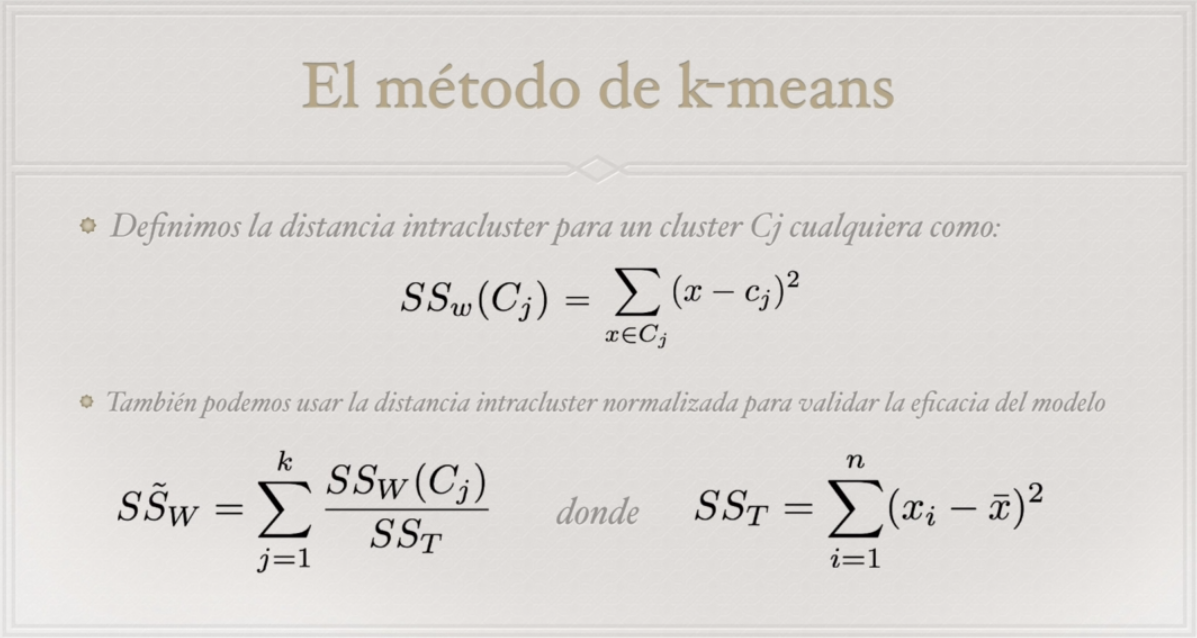

In [2]:
Image(filename="./images/kmeans_01.png")

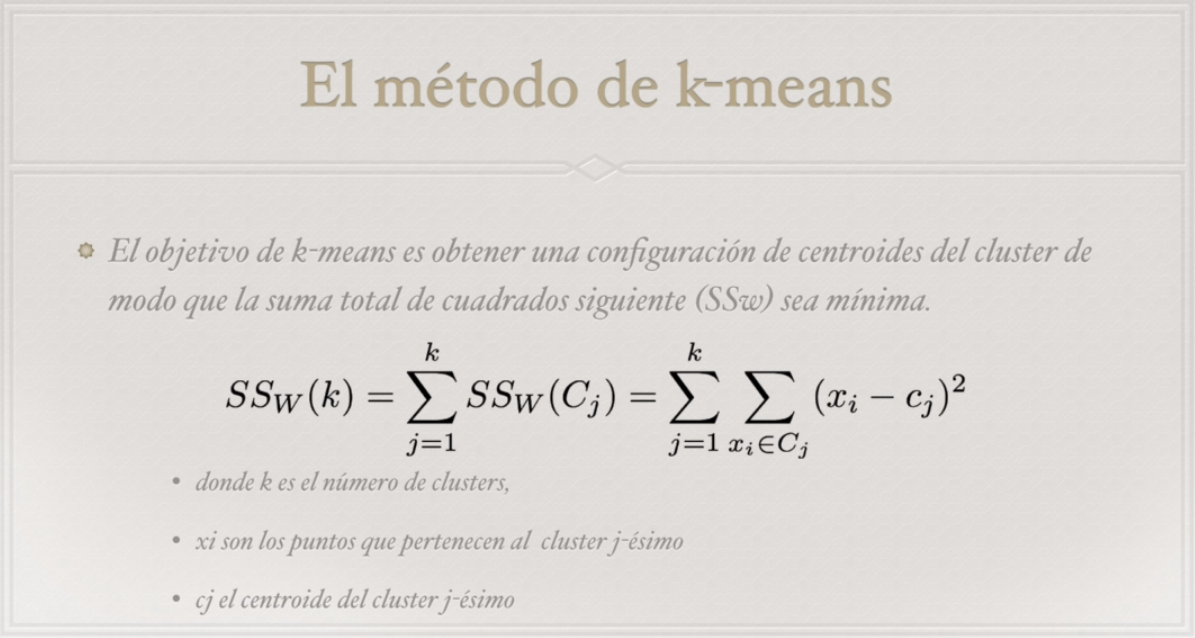

In [3]:
Image(filename="./images/kmeans_02.png")

## El método de K-means

In [4]:
import numpy as np

In [6]:
# Vamos a generar un array de 90 número aleatorios
data = np.random.random(90).reshape(30,3)
data

array([[0.20503644, 0.33333301, 0.3829856 ],
       [0.32736479, 0.52732628, 0.14756182],
       [0.04874826, 0.59349984, 0.07292338],
       [0.49178589, 0.00528311, 0.17126505],
       [0.36917661, 0.55271876, 0.56151909],
       [0.6118936 , 0.00234145, 0.51783369],
       [0.6632529 , 0.99560869, 0.7171589 ],
       [0.69562967, 0.07195756, 0.05985337],
       [0.9602917 , 0.92940104, 0.9410699 ],
       [0.13198402, 0.59900143, 0.26960248],
       [0.92398359, 0.41084084, 0.29622498],
       [0.21245439, 0.53576203, 0.12629145],
       [0.25996234, 0.99069201, 0.41330091],
       [0.75018923, 0.93644788, 0.42655507],
       [0.95272688, 0.71536889, 0.61098059],
       [0.54426665, 0.70902957, 0.08783359],
       [0.55081753, 0.74944581, 0.74518638],
       [0.48768817, 0.20386712, 0.86307602],
       [0.25381902, 0.58556087, 0.71079206],
       [0.1625312 , 0.71409019, 0.32855068],
       [0.89840398, 0.62394435, 0.14109062],
       [0.06187327, 0.04199709, 0.27628588],
       [0.

In [8]:
# Elegimos los centroides, en este caso aleatoriamente, de entre el rango de elementos del array
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
clust_centers = np.vstack([data[c1], data[c2]])
clust_centers

array([[0.55081753, 0.74944581, 0.74518638],
       [0.48768817, 0.20386712, 0.86307602]])

Una vez seleccionados los centroides podemos empezar a implementar el método de K-means

In [9]:
from scipy.cluster.vq import vq

In [10]:

clusters = vq(data, clust_centers)
clusters

(array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 0]),
 array([0.57196174, 0.67559109, 0.85342266, 0.71976025, 0.32469775,
        0.41860704, 0.27207244, 0.84012286, 0.48828612, 0.6513333 ,
        0.67488708, 0.73700834, 0.50293582, 0.41981515, 0.42509241,
        0.65862666, 0.        , 0.        , 0.3409536 , 0.5706151 ,
        0.7081657 , 0.7428613 , 0.36699748, 0.50638931, 0.46035504,
        0.40744592, 0.44558049, 0.42554523, 0.7457099 , 0.39986237]))

El primer array nos muestra la pertenencia de cada observación a un cluster u otro. El segundo array nos da la distancia de cada una de las observaciones del baricentro del clustering final.

In [11]:
labels = clusters[0]
labels

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0])

In [12]:
from scipy.cluster.vq import kmeans

In [13]:
kmeans(data, clust_centers)

(array([[0.4602902 , 0.74303754, 0.40430427],
        [0.48349322, 0.23672693, 0.52196739]]), 0.41745330860782803)

In [20]:
# A K-means se le puede dar también el nº de cluster que deseas, en lugar de los centroides calculados.
kmeans(data, 2)

(array([[0.77834566, 0.33487229, 0.5073308 ],
        [0.31518428, 0.6433338 , 0.42338887]]), 0.4016315309574145)

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as ply

In [19]:
x = []
y = []
z = []
x2 = []
y2 = []
z2 = []

for i in range(0, len(labels)):
    if(labels[i] == 0):
        x.append(data[i,0])
        y.append(data[i,1])
        z.append(data[i,2])
        
    else:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])

cluster1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.9
    ),
    name="Cluster 0"
)


cluster2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    ),
    name="Cluster 1"
)
data2 = [cluster1, cluster2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30
    )
)

fig = go.Figure(data=data2, layout=layout)
ply.plot(fig, filename='Clusters.html');